## Constraint Handling

**Constraint Handling** is essential for solving a real-world optimization problem. Different ways have been proposed in the literature to deal with inequality and equality constraints during optimization. A few ways will be described in this tutorial to give users of *pymoo* a starting point for how to solve optimization problems with constraints.

In this tutorial, we are going to have a look at the following constrained single-objective optimization problem:

\begin{align} 
\begin{split}
\max \;\; & f(x) = x_1^2 + x_2^2 \\[1mm]
\text{s.t.} \;\; & g(x) : x_1 + x_2 \geq 1 \\[2mm]
& 0 \leq x_1 \leq 2 \\
& 0 \leq x_2 \leq 2 
\end{split}
\end{align}

In [1]:
from pymoo.core.problem import ElementwiseProblem

class ConstrainedProblem(ElementwiseProblem):

    def __init__(self, **kwargs):
        super().__init__(n_var=2, n_obj=1, n_ieq_constr=1, n_eq_constr=0, xl=0, xu=2, **kwargs)

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = x[0] ** 2 + x[1] ** 2
        out["G"] = 1.0 - (x[0] + x[1])

For the problem defined above, the inequality constraint ensures that $1.0 - (x_1 + x_2) \leq 0.0$ or in other words $x_1 + x_2 \geq 1.0$. The objective functions wants to minimize the sum of both variables squared and thus the contour plot looks as follows:

/tmp/ipykernel_117536/276693180.py:12: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[0].set_label("$f(x)$")


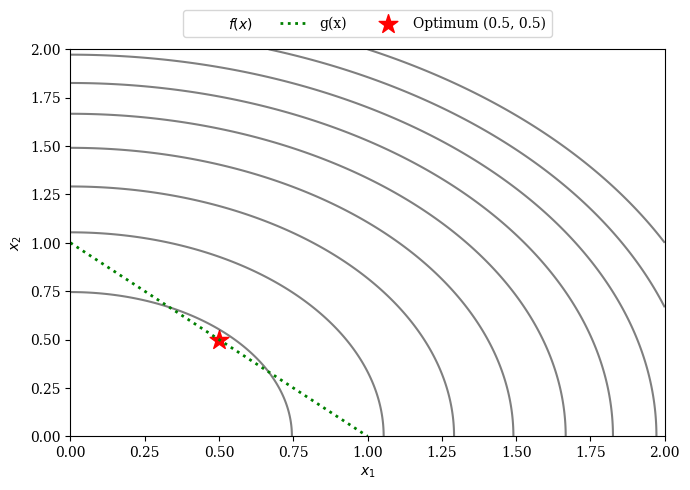

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X1, X2 = np.meshgrid(np.linspace(0, 2, 500), np.linspace(0, 2, 500))

F = X1**2 + X2**2
plt.rc('font', family='serif')

levels = 5 * np.linspace(0, 1, 10)
plt.figure(figsize=(7, 5))
CS = plt.contour(X1, X2, F, levels, colors='black', alpha=0.5)
CS.collections[0].set_label("$f(x)$")

X = np.linspace(0, 1, 500)
plt.plot(X, 1-X, linewidth=2.0, color="green", linestyle='dotted', label="g(x)")

plt.scatter([0.5], [0.5], marker="*", color="red", s=200, label="Optimum (0.5, 0.5)")

plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

The optimal solution is given by: $x^{(opt)} = (0.5, 0.5)$ with an objective value $f(x^{(opt)}) = 0.5$

Now let us introduce another constraint, this time an equality constraint.

\begin{align} 
\begin{split}
\max \;\; & f(x) = x_1^2 + x_2^2 \\[1mm]
\text{s.t.} \;\; & g(x) : x_1 + x_2 \geq 1 \\[2mm]
\;\; & h(x): 3 x_1 - x_2 = 0 \\[2mm]
& 0 \leq x_1 \leq 2 \\
& 0 \leq x_2 \leq 2 
\end{split}
\end{align}

In [ ]:
class ConstrainedProblemWithEquality(ElementwiseProblem):

    def __init__(self, **kwargs):
        super().__init__(n_var=2, n_obj=1, n_ieq_constr=1, n_eq_constr=1, xl=0, xu=1, **kwargs)

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = x[0] + x[1]
        out["G"] = 1.0 - (x[0] + x[1])
        out["H"] = 3 * x[0] - x[1]

The equality constraint is only satisfied if $3 \cdot x_1 - x_2 \approx 0$ or in other words $3\cdot x_1 \approx x_2$. 

/tmp/ipykernel_115695/1746868128.py:12: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  CS.collections[0].set_label("$f(x)$")


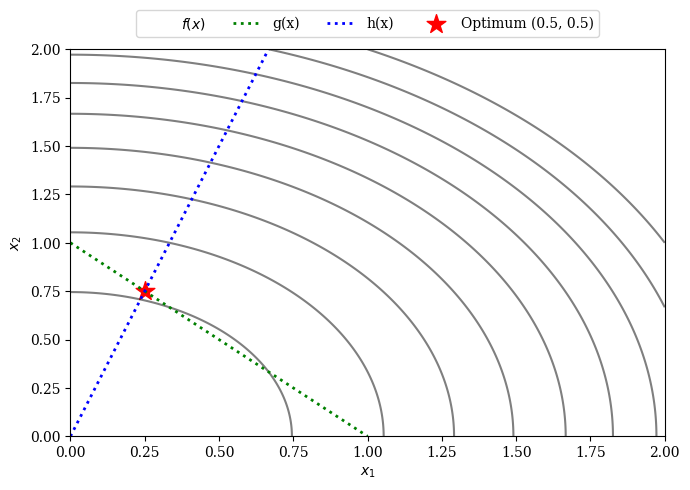

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X1, X2 = np.meshgrid(np.linspace(0, 2, 500), np.linspace(0, 2, 500))

F = X1**2 + X2**2
plt.rc('font', family='serif')

levels = 5 * np.linspace(0, 1, 10)
plt.figure(figsize=(7, 5))
CS = plt.contour(X1, X2, F, levels, colors='black', alpha=0.5)
CS.collections[0].set_label("$f(x)$")

X = np.linspace(0, 1, 500)
plt.plot(X, 1-X, linewidth=2.0, color="green", linestyle='dotted', label="g(x)")
plt.plot(X, 3*X, linewidth=2.0, color="blue", linestyle='dotted', label="h(x)")

plt.scatter([0.25], [0.75], marker="*", color="red", s=200, label="Optimum (0.5, 0.5)")

plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

The two constrained problems above will be used from now on and solved using different approaches.